In [14]:
import pandas as pd 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import numpy as np

In [9]:
data = pd.read_csv("C:/Users/USER/Downloads/college_student_placement_dataset.csv")
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [10]:
data.shape

(10000, 10)

In [11]:
data.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [19]:
x=data.iloc[:,1:-1].values  
y=data.iloc[:,-1].values
print(x,y)

[[107 161 173 ...   8   8   4]
 [ 97  52  82 ...   7   8   0]
 [109  36 128 ...   3   1   1]
 ...
 [ 89 108 170 ...   3   9   5]
 [107 377 437 ...   7   5   1]
 [109 441 522 ...   3   5   5]] [0 0 0 ... 0 0 0]


In [18]:
label=LabelEncoder()
data['Prev_Sem_Result']=label.fit_transform (data['Prev_Sem_Result'])
data['CGPA']=label.fit_transform (data['CGPA'])
data['Internship_Experience']=label.fit_transform (data['Internship_Experience'])
data['Placement']=label.fit_transform (data['Placement'])
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,341,374,4,0,1,8,0,1
9996,CLG0098,70,425,479,7,0,0,7,2,0
9997,CLG0066,89,108,170,3,1,3,9,5,0
9998,CLG0045,107,377,437,3,0,7,5,1,0
9999,CLG0060,109,441,522,8,0,3,5,5,0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_k

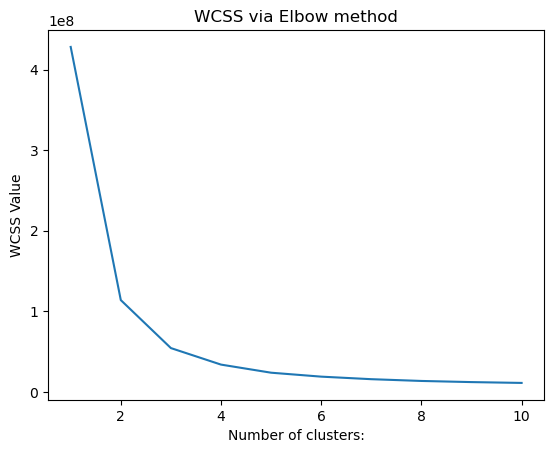

In [20]:
wcss=[] 
for i in range(1,11): 
   model=KMeans(n_clusters=i,init='k-means++',random_state=21) 
   model.fit(x) 
   wcss.append(model.inertia_) 
plt.plot(range(1,11),wcss) 
plt.title('WCSS via Elbow method') 
plt.xlabel('Number of clusters:') 
plt.ylabel('WCSS Value') 
plt.show()

In [21]:
model = KMeans(n_clusters=4,init='k-means++',random_state=42) 
y_means=model.fit_predict(x) 
print("y_means:\n\n",y_means) 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


y_means:

 [2 0 0 ... 0 3 3]


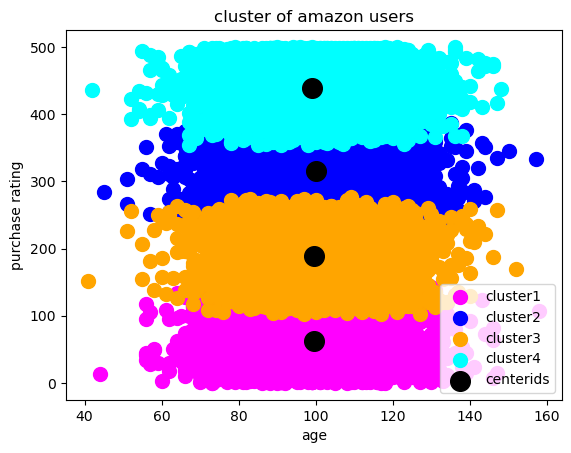

In [24]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='magenta',label='cluster1') 
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='cluster2') 
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='orange',label='cluster3') 
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label='cluster4') 
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_
 [:,1],s=200,c='black',label='centerids') 
plt.title('cluster of amazon users') 
plt.xlabel('age') 
plt.ylabel('purchase rating') 
plt.legend() 
plt.show()